<a href="https://colab.research.google.com/github/ChoEChoU/AI_Final/blob/hht/resnet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import keras
import numpy as np 
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

In [ ]:
batch_size = 32
data_generator = {
    'train':ImageDataGenerator(rescale=1/255.),
    'val':ImageDataGenerator(rescale=1/255.),
    'test':ImageDataGenerator(rescale=1/255.),  
}

In [ ]:
data_sets = {
    'train':data_generator['train'].flow_from_directory(directory='/content/drive/MyDrive/AI project/Vegetable Images/train/',shuffle=True,class_mode='binary' ,batch_size=batch_size),
    'val':data_generator['val'].flow_from_directory('/content/drive/MyDrive/AI project/Vegetable Images/validation/',shuffle=False,class_mode='binary',batch_size=batch_size),
    'test':data_generator['test'].flow_from_directory('/content/drive/MyDrive/AI project/Vegetable Images/test/',shuffle=False,class_mode='binary',batch_size=batch_size)
}

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [3]:
base_model = ResNet50V2(input_shape=(224,224,3), include_top=False)
base_model.trainable = False

model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dense(15, activation='softmax')
])
model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 24,093,199
Trainable params: 528,399
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
cbs = [EarlyStopping(patience=3)]

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(data_sets['train'], validation_data=data_sets['val'], callbacks=cbs, epochs=30)

94668760/94668760 [==============================] - 0s 0us/step
Epoch 1/30
469/469 [==============================] - 3411s 7s/step - loss: 0.0723 - accuracy: 0.9793 - val_loss: 0.0550 - val_accuracy: 0.9817
Epoch 2/30
469/469 [==============================] - 52s 111ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0124 - val_accuracy: 0.9973
Epoch 3/30
469/469 [==============================] - 52s 110ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.0171 - val_accuracy: 0.9953
Epoch 4/30
469/469 [==============================] - 51s 110ms/step - loss: 9.2417e-04 - accuracy: 0.9999 - val_loss: 0.0112 - val_accuracy: 0.9967
Epoch 5/30
469/469 [==============================] - 51s 109ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 6/30
469/469 [==============================] - 51s 110ms/step - loss: 8.0567e-05 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 7/30
469/469 [==============================] - 52s 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.072273,0.979267,0.055026,0.981667
1,0.008375,0.997400,0.012366,0.997333
2,0.009596,0.997800,0.017128,0.995333
3,0.000924,0.999867,0.011246,0.996667
4,0.002517,0.999333,0.008475,0.997667
5,0.000081,1.000000,0.008191,0.998333
6,0.000043,1.000000,0.009015,0.998333
7,0.000032,1.000000,0.008578,0.998333
8,0.000024,1.000000,0.008652,0.998333


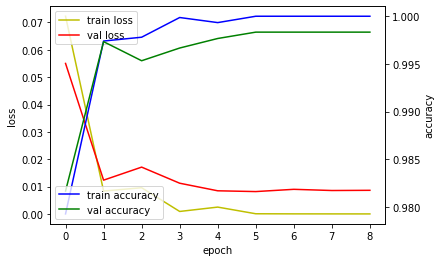

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [ ]:
score = model.evaluate(data_sets['test'])

94/94 [==============================] - 579s 6s/step - loss: 0.0066 - accuracy: 0.9987


In [ ]:
print('{}:{}'.format(model.metrics_names[1],score[1]*100))
print('{}:{}'.format(model.metrics_names[0],score[0]))

accuracy:99.86666440963745
loss:0.006595928687602282


In [ ]:
classes = list(data_sets['test'].class_indices.keys())
real_classes = [classes[x] for x in data_sets['test'].labels]

pred = tf.argmax(model.predict(data_sets['test']),axis=1)
pred_classes = [classes[x] for x in pred]

94/94 [==============================] - 9s 91ms/step


Text(114.0, 0.5, 'Predict')

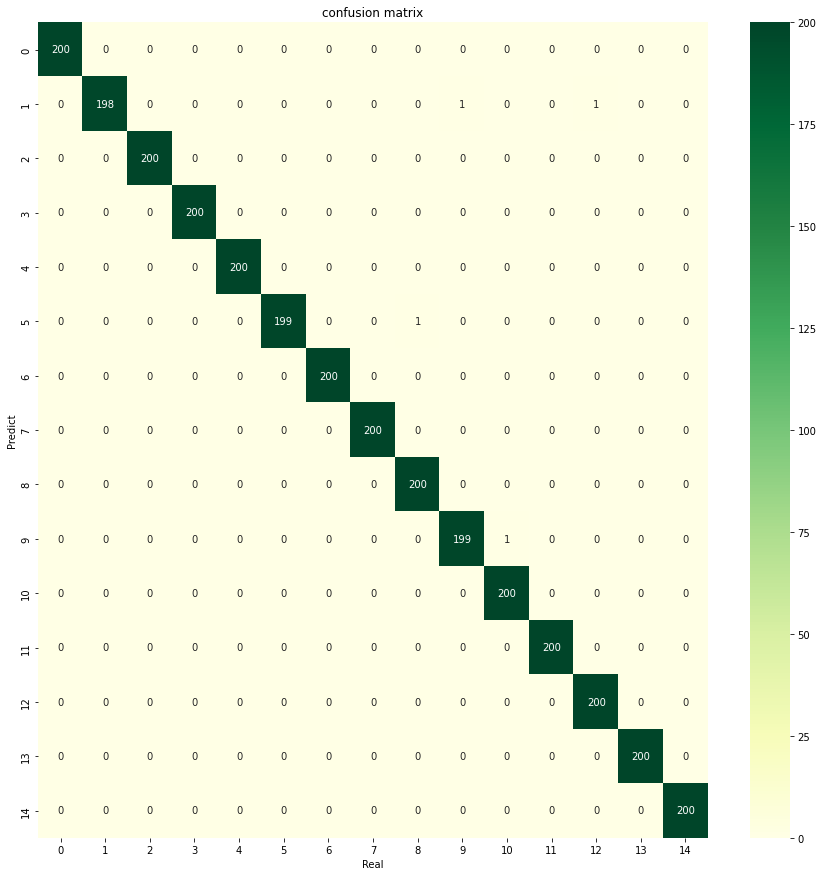

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns
cf_matrix = metrics.confusion_matrix(real_classes,pred_classes)
plt.figure(figsize=(15,15))
plt.title("confusion matrix")
con_matric = sns.heatmap(cf_matrix,annot=True,fmt='d',cmap="YlGn")
con_matric.set_xlabel("Real")
con_matric.set_ylabel("Predict")

In [ ]:
print(classification_report(real_classes,pred_classes))

              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       200
Bitter_Gourd       1.00      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      1.00      1.00       200
     Cabbage       1.00      0.99      1.00       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      1.00      1.00       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       1.00      1.00      1.00       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   